# Machine Learning

Esse modelo classifica se um produto é um **perfume** ou um **celular**, com base no preço, na avaliação, número de avaliações e termômetro

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.graphics.gofplots import qqplot
import pylab as py
from scipy.stats import norm
import seaborn as sn
from sklearn import metrics
from plotnine import ggplot, aes, geom_point

## Funções para salvar e carregar o dataset

In [2]:
def save_dataset(df, fname):
    df.to_csv(fname, index=False)

def load_dataset(fname):
    d = pd.read_csv(fname)
    d["Número de avaliações"] = d["Número de avaliações"].astype('Int32')
    d["Termômetro"] = d["Termômetro"].astype('Int32')
    return d

## Carregando dataset

In [3]:
df = load_dataset("dataset.csv")
df

,Nome,Preço,Categoria,Avaliação,Número de avaliações,Termômetro,Vendedor
0,Smartphone Samsung Galaxy A14 5g 128gb 4gb Preto,1099.00,Celulares e Smartphones,4.8,205,5,Mercado Livre
1,Moto E40 Dual SIM 64 GB grafite 4 GB RAM,769.00,Celulares e Smartphones,4.6,824,5,123 Comprou
2,Samsung Galaxy S20 FE 5G 5G Dual SIM 128 GB cl...,1869.00,Celulares e Smartphones,4.8,2281,5,Mercado Livre
3,Apple iPhone 11 (128 GB) - Branco,3988.10,Celulares e Smartphones,4.5,2573,5,NILTONDASILVALIPPERTJUNIOR
4,Xiaomi Redmi Note 11 (Snapdragon) Dual SIM 128...,1229.30,Celulares e Smartphones,4.7,4057,5,JEFERSON ELETROSTORE
...,...,...,...,...,...,...,...
8477,Paçoca Quadrada Lual Zero Açúcar Display 432g ...,30.50,Guloseimas,NaN,<NA>,5,4WELL
8478,Óleo Essencial Natural De Cedro Virgínia 10ml Wnf,31.89,Cuidado do Corpo,NaN,<NA>,5,LOJAS THERAPON
8479,Biscoito Maizena Vitarella Tradicional 350g - ...,23.99,Biscoitos,NaN,<NA>,5,DISMAX+DISTRIBUIÇÃO_MÁXIMA
8480,Sabonete Íntimo Diário Instance Eudora - Fruta...,23.44,Sabonetes Íntimos,NaN,<NA>,5,1981_VENDAS


## Removendo linhas com dados faltantes

In [4]:
df = df[~df.isnull().any(axis=1)].reset_index(drop=True)
df

,Nome,Preço,Categoria,Avaliação,Número de avaliações,Termômetro,Vendedor
0,Smartphone Samsung Galaxy A14 5g 128gb 4gb Preto,1099.00,Celulares e Smartphones,4.8,205,5,Mercado Livre
1,Moto E40 Dual SIM 64 GB grafite 4 GB RAM,769.00,Celulares e Smartphones,4.6,824,5,123 Comprou
2,Samsung Galaxy S20 FE 5G 5G Dual SIM 128 GB cl...,1869.00,Celulares e Smartphones,4.8,2281,5,Mercado Livre
3,Apple iPhone 11 (128 GB) - Branco,3988.10,Celulares e Smartphones,4.5,2573,5,NILTONDASILVALIPPERTJUNIOR
4,Xiaomi Redmi Note 11 (Snapdragon) Dual SIM 128...,1229.30,Celulares e Smartphones,4.7,4057,5,JEFERSON ELETROSTORE
...,...,...,...,...,...,...,...
3290,Loção Hidrata & Revitaliza Para Corpo Neutroge...,28.41,Cuidado do Corpo,4.7,3,5,Mercado Livre Beauty
3291,Erva-mate Tertúlia chimarrão alto vácuo 1 kg,27.20,Erva-Mate,5.0,3,5,LOJAO-DO-TERERE
3292,Colgate Luminous White Lovers Café Branqueador...,13.56,Creme Dental,5.0,2,5,Mercado Livre
3293,Kit Babosa No Cabelo Forever Liss Com Shampoo ...,26.99,Tratamentos com o Cabelo,4.0,2,5,Forever Liss


In [5]:
# Selecionando o que queremos classificar (2 categorias com maior frequência)
df_category = pd.DataFrame(df[["Categoria"]].value_counts(), columns=["Frequência"]).head(2)
df_category

,Frequência
Categoria,
Perfumes,489
Celulares e Smartphones,323


In [6]:
category_list = list(map(lambda x: x[0], df_category.index.values))

In [7]:
# Removemos do dataset os produtos que não fazem parte dessas 2 categorias
df.drop(df[~df["Categoria"].isin(category_list)].index, inplace=True)
df

,Nome,Preço,Categoria,Avaliação,Número de avaliações,Termômetro,Vendedor
0,Smartphone Samsung Galaxy A14 5g 128gb 4gb Preto,1099.00,Celulares e Smartphones,4.8,205,5,Mercado Livre
1,Moto E40 Dual SIM 64 GB grafite 4 GB RAM,769.00,Celulares e Smartphones,4.6,824,5,123 Comprou
2,Samsung Galaxy S20 FE 5G 5G Dual SIM 128 GB cl...,1869.00,Celulares e Smartphones,4.8,2281,5,Mercado Livre
3,Apple iPhone 11 (128 GB) - Branco,3988.10,Celulares e Smartphones,4.5,2573,5,NILTONDASILVALIPPERTJUNIOR
4,Xiaomi Redmi Note 11 (Snapdragon) Dual SIM 128...,1229.30,Celulares e Smartphones,4.7,4057,5,JEFERSON ELETROSTORE
...,...,...,...,...,...,...,...
3067,Prada Candy Edp 50ml Feminino | Ganhe Amostra ...,540.94,Perfumes,5.0,1,5,Bagatelle Perfumaria
3068,Shakira Dance Diamonds 80ml | Original + Amost...,199.00,Perfumes,5.0,1,5,Bagatelle Perfumaria
3069,Ferrari Scuderia Black Edt 125 ml Masculino Or...,184.72,Perfumes,3.5,22,5,ONSHOP_EJOTA
3070,Kit 3 Perfumes Tradicional Cuba Gold Paris Imp...,183.25,Perfumes,5.0,2,5,DBE+GROUP


In [8]:
df["Categoria"] = df["Categoria"].astype('category')
df.dtypes

Nome                      object
Preço                    float64
Categoria               category
Avaliação                float64
Número de avaliações       Int32
Termômetro                 Int32
Vendedor                  object
dtype: object

In [9]:
# Adiciona coluna com código da categoria (0 ou 1)
df["Categoria_cat"] = df["Categoria"].cat.codes
df

,Nome,Preço,Categoria,Avaliação,Número de avaliações,Termômetro,Vendedor,Categoria_cat
0,Smartphone Samsung Galaxy A14 5g 128gb 4gb Preto,1099.00,Celulares e Smartphones,4.8,205,5,Mercado Livre,0
1,Moto E40 Dual SIM 64 GB grafite 4 GB RAM,769.00,Celulares e Smartphones,4.6,824,5,123 Comprou,0
2,Samsung Galaxy S20 FE 5G 5G Dual SIM 128 GB cl...,1869.00,Celulares e Smartphones,4.8,2281,5,Mercado Livre,0
3,Apple iPhone 11 (128 GB) - Branco,3988.10,Celulares e Smartphones,4.5,2573,5,NILTONDASILVALIPPERTJUNIOR,0
4,Xiaomi Redmi Note 11 (Snapdragon) Dual SIM 128...,1229.30,Celulares e Smartphones,4.7,4057,5,JEFERSON ELETROSTORE,0
...,...,...,...,...,...,...,...,...
3067,Prada Candy Edp 50ml Feminino | Ganhe Amostra ...,540.94,Perfumes,5.0,1,5,Bagatelle Perfumaria,1
3068,Shakira Dance Diamonds 80ml | Original + Amost...,199.00,Perfumes,5.0,1,5,Bagatelle Perfumaria,1
3069,Ferrari Scuderia Black Edt 125 ml Masculino Or...,184.72,Perfumes,3.5,22,5,ONSHOP_EJOTA,1
3070,Kit 3 Perfumes Tradicional Cuba Gold Paris Imp...,183.25,Perfumes,5.0,2,5,DBE+GROUP,1


In [10]:
code_to_cat = df["Categoria"].cat.categories.values
code_to_cat

array(['Celulares e Smartphones', 'Perfumes'], dtype=object)

In [11]:
X = pd.DataFrame(df[['Preço','Número de avaliações', 'Avaliação', 'Termômetro']])
Y = pd.DataFrame(df['Categoria_cat'])

In [12]:
Y

,Categoria_cat
0,0
1,0
2,0
3,0
4,0
...,...
3067,1
3068,1
3069,1
3070,1


In [13]:
X_y_df = pd.concat([X, Y], axis=1, sort=False)
X_y_df

,Preço,Número de avaliações,Avaliação,Termômetro,Categoria_cat
0,1099.00,205,4.8,5,0
1,769.00,824,4.6,5,0
2,1869.00,2281,4.8,5,0
3,3988.10,2573,4.5,5,0
4,1229.30,4057,4.7,5,0
...,...,...,...,...,...
3067,540.94,1,5.0,5,1
3068,199.00,1,5.0,5,1
3069,184.72,22,3.5,5,1
3070,183.25,2,5.0,5,1


In [14]:
y = Y.values


In [15]:
y


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

# Regressão Logística

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import seaborn as sns

from itertools import cycle
from scipy import interp

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (544, 4) y: (544, 1)
TESTE:
X: (268, 4) y: (268, 1)


In [19]:
model = Pipeline([('nor', MinMaxScaler()), ('LR', OneVsRestClassifier(LogisticRegression()))])
params = {}

In [20]:
gs = GridSearchCV(model, params, cv=5, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('nor', MinMaxScaler()),
                                       ('LR',
                                        OneVsRestClassifier(estimator=LogisticRegression()))]),
             param_grid={})

In [21]:
gs.cv_results_

{'mean_fit_time': array([0.00639863]),
 'std_fit_time': array([0.00101924]),
 'mean_score_time': array([0.00160184]),
 'std_score_time': array([0.00049049]),
 'params': [{}],
 'split0_test_score': array([0.80733945]),
 'split1_test_score': array([0.80733945]),
 'split2_test_score': array([0.7706422]),
 'split3_test_score': array([0.81651376]),
 'split4_test_score': array([0.83333333]),
 'mean_test_score': array([0.80703364]),
 'std_test_score': array([0.0205235]),
 'rank_test_score': array([1])}

In [22]:
y_pred = gs.predict(X_test)

## Acurácia

In [23]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test.ravel(), y_pred.ravel())

Accuracy
0.8432835820895522


## Matriz de Confusão

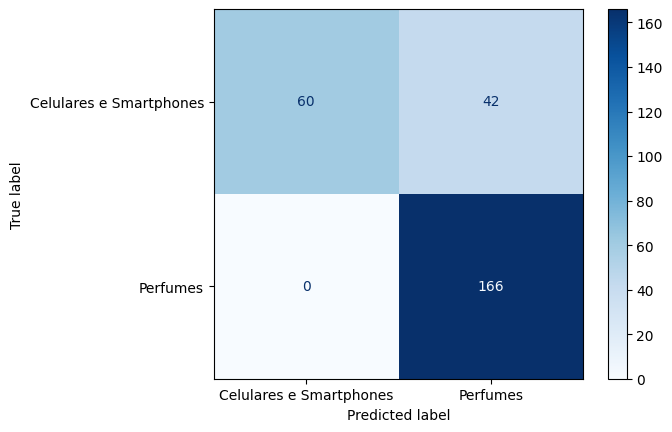

In [24]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [code_to_cat[0], code_to_cat[1]])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

## Curva ROC

In [25]:
# Compute ROC curve and ROC area for each class
n_classes = len(category_list)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_20080\1358993045.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


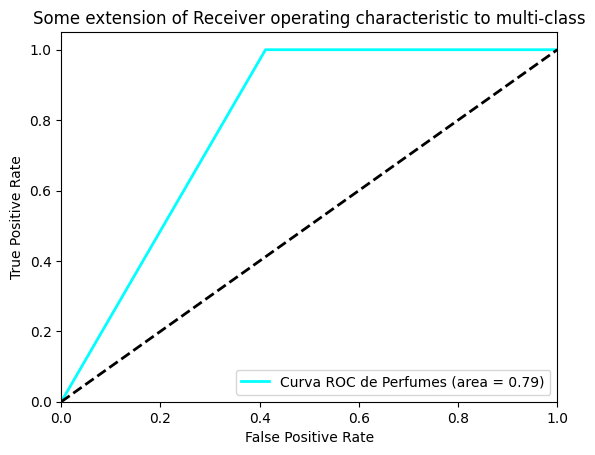

In [26]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Curva ROC de {0} (area = {1:0.2f})'
             ''.format(category_list[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Com Undersampling

In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (544, 4) y: (544, 1)
TESTE:
X: (268, 4) y: (268, 1)


In [29]:
print("Reamostragem de dados usando Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train.ravel())
print("... Feito!")

print("X e Y RUS:", len(X_RUS), len(y_RUS))


Reamostragem de dados usando Random UnderSampling (RUS)...
... Feito!
X e Y RUS: 442 442


In [30]:
model = Pipeline([('nor', MinMaxScaler()), ('LR', LogisticRegression())])
params = {'LR__random_state': [0]}

gs = GridSearchCV(model, params, cv=5, scoring='accuracy', refit=True)
gs.fit(X_RUS, y_RUS.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('nor', MinMaxScaler()),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__random_state': [0]}, scoring='accuracy')

In [31]:
gs.cv_results_

{'mean_fit_time': array([0.00562272]),
 'std_fit_time': array([0.00078338]),
 'mean_score_time': array([0.0017972]),
 'std_score_time': array([0.00039816]),
 'param_LR__random_state': masked_array(data=[0],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'LR__random_state': 0}],
 'split0_test_score': array([0.86516854]),
 'split1_test_score': array([0.85393258]),
 'split2_test_score': array([0.78409091]),
 'split3_test_score': array([0.85227273]),
 'split4_test_score': array([0.86363636]),
 'mean_test_score': array([0.84382022]),
 'std_test_score': array([0.03029761]),
 'rank_test_score': array([1])}

In [32]:
y_pred = gs.predict(X_test)

## Acurácia

In [33]:
print(accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test.ravel(), y_pred.ravel())

0.9104477611940298


## Matriz de Confusão

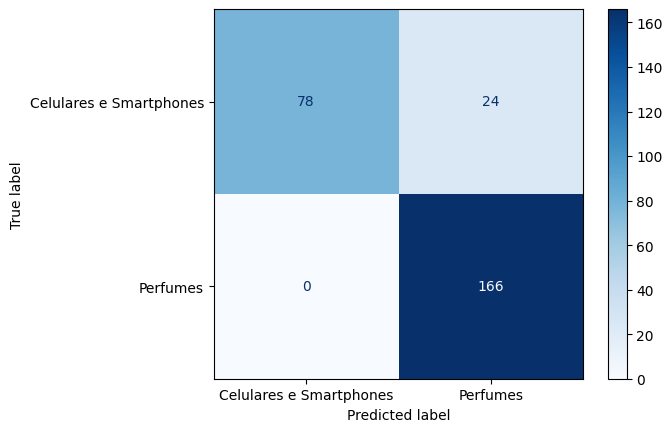

In [34]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [code_to_cat[0], code_to_cat[1]])

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [35]:
# Compute ROC curve and ROC area for each class
n_classes = len(category_list)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_20080\875523834.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


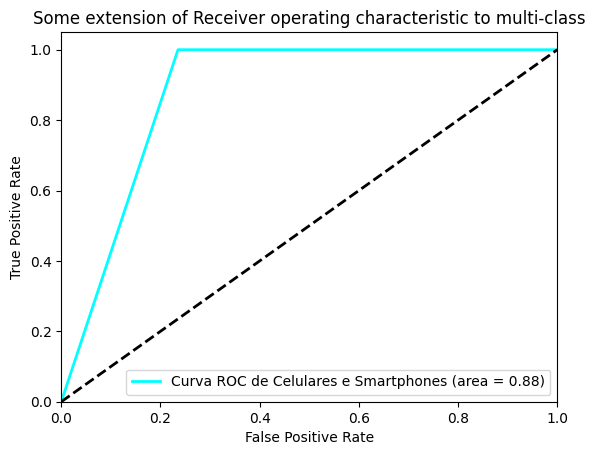

In [36]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Curva ROC de {0} (area = {1:0.2f})'
             ''.format(code_to_cat[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [37]:
print("ROC_AUC")
print(roc_auc_score(y_test,y_pred))

ROC_AUC
0.8823529411764706
